In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
russell = pd.read_csv('Russell2000 Daily Returns.csv')

russell['RET'] = pd.to_numeric(russell['RET'], errors='coerce')
russell['RETX'] = pd.to_numeric(russell['RETX'], errors='coerce')

russell.head(10)

C:\Users\joel3\AppData\Local\Temp\ipykernel_26708\654371068.py:1: DtypeWarning: Columns (2,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  russell = pd.read_csv('Russell2000 Daily Returns.csv')


,PERMNO,date,SICCD,TICKER,COMNAM,HSICIG,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,NUMTRD,RETX,sprtrn,enterdate,positive,negative,total,market_cap
0,10026,2023-01-03,2052,JJSF,J & J SNACK FOODS CORP,NaN,147.08000,151.92000,151.48000,89954.0,0.011823,19229.0,3627.0,0.011823,-0.004001,2023-01-03,0.0,0.0,2.0,2.912809e+06
1,10026,2023-01-04,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.24001,153.09000,151.22000,52980.0,-0.001716,19229.0,2367.0,-0.001716,0.007539,NaN,0.0,0.0,0.0,2.907809e+06
2,10026,2023-01-05,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.68500,153.00000,149.60001,60472.0,-0.010713,19229.0,2510.0,-0.010713,-0.011646,NaN,0.0,0.0,0.0,2.876659e+06
3,10026,2023-01-06,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.85001,153.32001,152.64000,57034.0,0.020321,19229.0,5521.0,0.020321,0.022841,2023-01-06,0.0,0.0,2.0,2.935115e+06
4,10026,2023-01-09,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.39999,152.49001,149.61000,63214.0,-0.019851,19229.0,3466.0,-0.019851,-0.000768,NaN,0.0,0.0,0.0,2.876851e+06
5,10026,2023-01-10,2052,JJSF,J & J SNACK FOODS CORP,NaN,148.88000,151.06000,149.87000,112759.0,0.001738,19229.0,3001.0,0.001738,0.006978,NaN,0.0,0.0,0.0,2.881850e+06
6,10026,2023-01-11,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.32001,152.53999,152.39000,57350.0,0.016815,19229.0,2634.0,0.016815,0.012849,NaN,0.0,0.0,0.0,2.930307e+06
7,10026,2023-01-12,2052,JJSF,J & J SNACK FOODS CORP,NaN,149.81500,153.10001,152.42999,70931.0,0.000262,19229.0,2786.0,0.000262,0.003416,NaN,0.0,0.0,0.0,2.931076e+06
8,10026,2023-01-13,2052,JJSF,J & J SNACK FOODS CORP,NaN,150.50000,154.67000,154.49001,50967.0,0.013514,19229.0,2605.0,0.013514,0.003997,NaN,0.0,0.0,0.0,2.970688e+06
9,10026,2023-01-17,2052,JJSF,J & J SNACK FOODS CORP,NaN,153.66000,157.09000,154.22000,67542.0,-0.001748,19229.0,2452.0,-0.001748,-0.002030,NaN,0.0,0.0,0.0,2.965496e+06


         market_cap        SHROUT           VOL            PRC          ASKHI  \
count  2.343600e+04  2.343600e+04  2.343600e+04   23436.000000   23436.000000   
mean   2.032265e+07  2.433411e+05  2.334596e+06     218.578763     363.358260   
std    1.010394e+08  6.816393e+05  6.455127e+06    5779.120787   11891.014829   
min    4.930343e+04  9.710000e+02  6.335500e+02      -6.007367       0.710000   
25%    1.369889e+06  4.539254e+04  3.079372e+05      20.601283      22.806250   
50%    3.289927e+06  8.744355e+04  7.528065e+05      42.479943      46.000000   
75%    1.021348e+07  1.957896e+05  1.894240e+06      91.919545      98.475000   
max    3.022032e+09  1.583174e+07  1.947476e+08  275845.278937  566570.000000   

              BIDLO         total      negative      positive        sprtrn  \
count  23436.000000  23447.000000  23447.000000  23447.000000  23447.000000   
mean      82.261397      4.458694      0.043332      0.466840      0.019104   
std      203.341154      4.675569

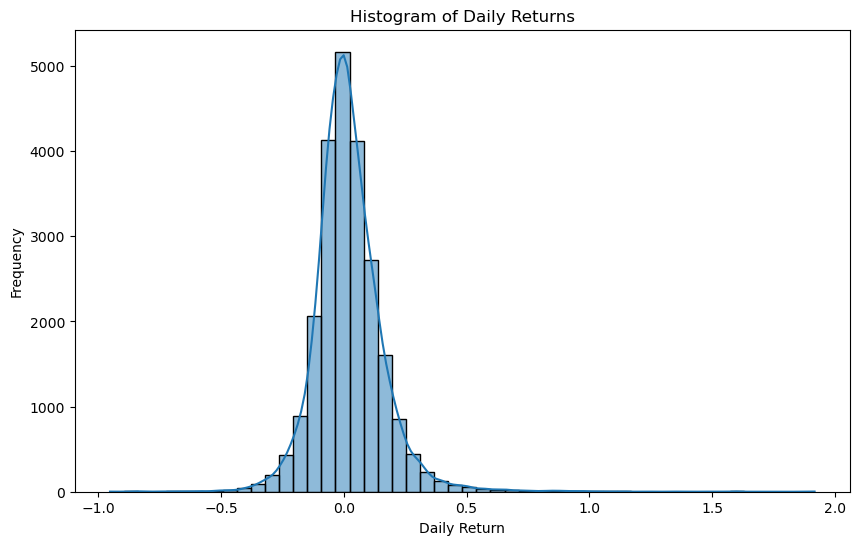

In [3]:
# Change date format
russell['date'] = pd.to_datetime(russell['date'], format='%Y-%m-%d')

# Remove the columns HSICIG and enterdate
russell.drop(columns=['HSICIG', 'enterdate', 'NUMTRD'], inplace=True)

# Reset index
russell.reset_index(drop=True, inplace=True)


# Group by month and ticker and perform aggregations
agg_columns = {
    'SICCD': 'first',
    'COMNAM': 'first',
    'market_cap': 'mean',
    'SHROUT': 'mean',
    'VOL': 'mean',
    'PRC': 'mean',
    'ASKHI': 'max',
    'BIDLO': 'min',
    'total': 'sum',
    'negative': 'sum',
    'positive': 'sum',
    'sprtrn': lambda x: (1 + x).prod() - 1,
    'RET': lambda x: (1 + x).prod() - 1
}

# Group by 'TICKER' and resample the data to monthly frequency
russell = russell.groupby('TICKER').resample('M', on='date').agg(agg_columns).reset_index()

# Adding lagged columns
russell['next_month_return'] = russell.groupby('TICKER')['RET'].shift(-1)
russell['last_month_return'] = russell.groupby('TICKER')['RET'].shift(1)
russell['last_month_volume'] = russell.groupby('TICKER')['VOL'].shift(1)

# Add columns for moving averages
russell['1_month_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=1).mean().reset_index(drop=True)
russell['2_month_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=2).mean().reset_index(drop=True)
russell['3_month_ma'] = russell.groupby('TICKER')['PRC'].rolling(window=3).mean().reset_index(drop=True)

# Create "proper?" column
russell['proper?'] = (russell['1_month_ma'] > russell['2_month_ma']) & (russell['2_month_ma'] > russell['3_month_ma']).astype(int)

# Create price minus 
russell['Ask_minus_Bid'] = russell['ASKHI'] - russell['BIDLO']

# Create comp_size column
russell['comp_size'] = pd.qcut(russell['market_cap'], q=10, labels=False)

# Display summary statistics
print(russell.describe())

# Plot histogram of returns
plt.figure(figsize=(10, 6))
sns.histplot(data=russell, x='RET', bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


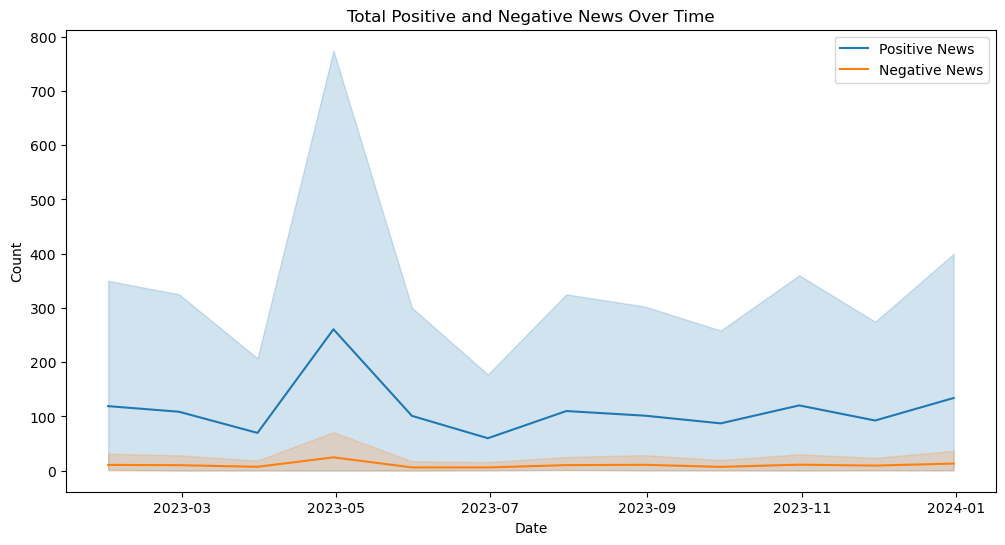

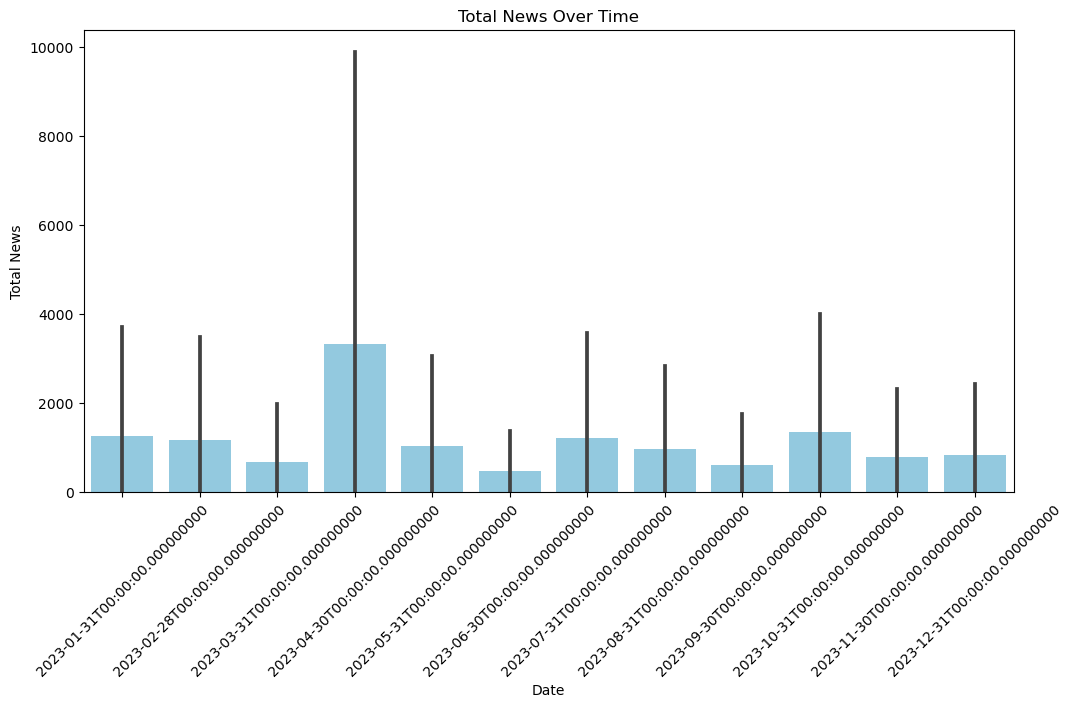

In [4]:
# Daily aggregation
daily_summary = russell.groupby(['date', 'sprtrn']).agg(
    sum_positive=('positive', 'sum'),
    sum_negative=('negative', 'sum'),
    sum_total=('total', 'sum')
).reset_index()

# Plot line chart of total positive and negative news over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='sum_positive', label='Positive News')
sns.lineplot(data=daily_summary, x='date', y='sum_negative', label='Negative News')
plt.title('Total Positive and Negative News Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot bar chart of total news over time
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_summary, x='date', y='sum_total', color='skyblue')
plt.title('Total News Over Time')
plt.xlabel('Date')
plt.ylabel('Total News')
plt.xticks(rotation=45)
plt.show()

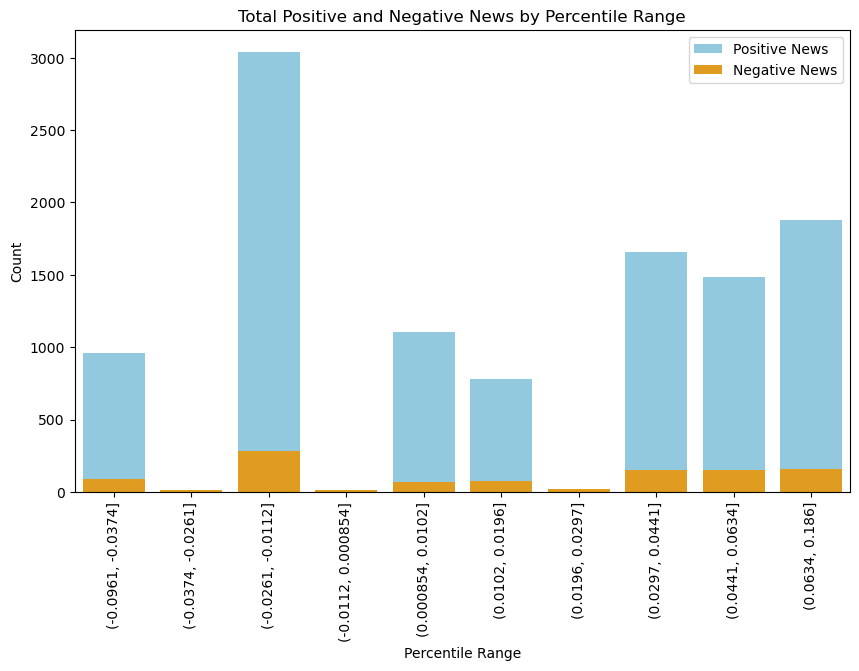

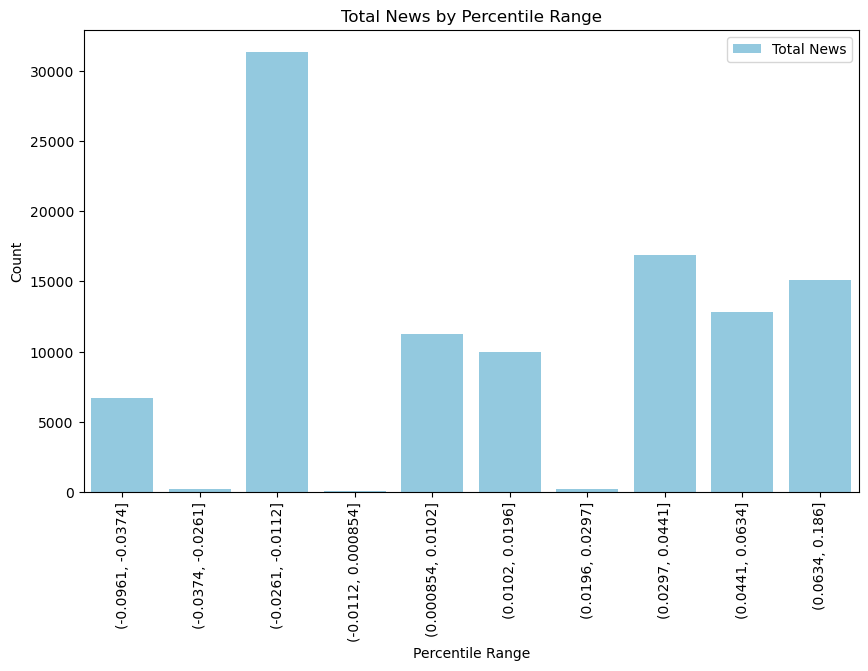

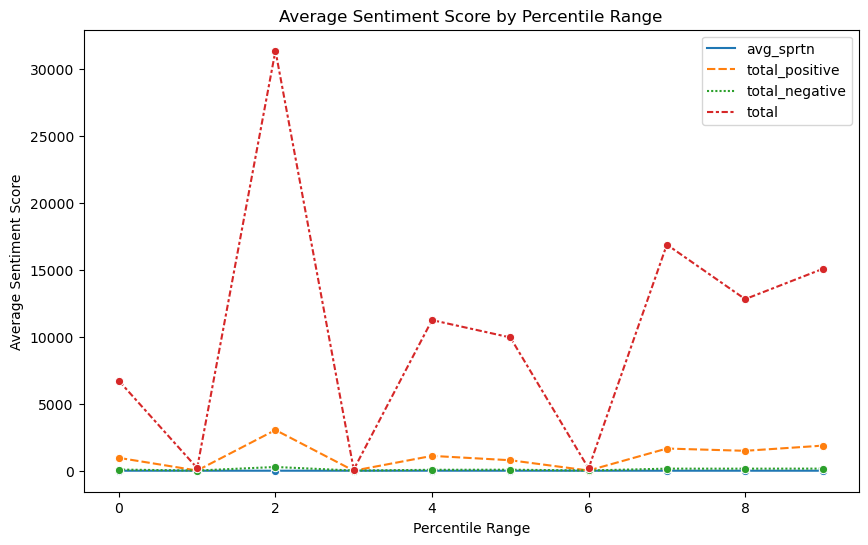

In [5]:
# Percentile summary
ranked_sprtrn = daily_summary.copy()
ranked_sprtrn['sprtrn_percentile'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10, labels=False)
ranked_sprtrn['percentile_range'] = pd.qcut(ranked_sprtrn['sprtrn'], q=10)

percentile_summary = ranked_sprtrn.groupby('percentile_range').agg(
    avg_sprtn=('sprtrn', 'mean'),
    total_positive=('sum_positive', 'sum'),
    total_negative=('sum_negative', 'sum'),
    total=('sum_total', 'sum')
).reset_index()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=percentile_summary, x='percentile_range', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot bar chart of total positive and negative news by percentile range
plt.figure(figsize=(10, 6))
sns.barplot(data=percentile_summary, x='percentile_range', y='total', color='skyblue', label='Total News')
plt.title('Total News by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()

# Plot line chart of average sentiment score by percentile range
plt.figure(figsize=(10, 6))
sns.lineplot(data=percentile_summary.drop(columns='percentile_range'), marker='o', color='green')
plt.title('Average Sentiment Score by Percentile Range')
plt.xlabel('Percentile Range')
plt.ylabel('Average Sentiment Score')
plt.show()


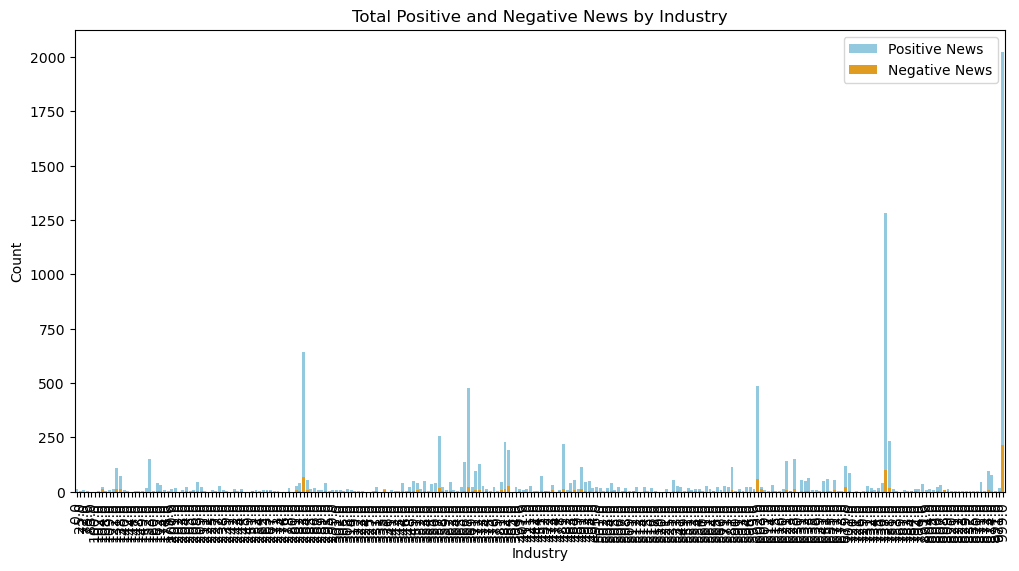

In [6]:
# Assuming 'russell' is your DataFrame containing the data
russell['SICCD'] = pd.to_numeric(russell['SICCD'], errors='coerce')

# Industry summary
industry_summary = russell.groupby(russell['SICCD'] // 10).agg(
    num_firms=('TICKER', 'nunique'),
    cum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

industry_summary['positive_perc'] = industry_summary['total_positive'] / industry_summary['total']
industry_summary['negative_perc'] = industry_summary['total_negative'] / industry_summary['total']

# Plot bar chart of total positive and negative news by industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_summary, x='SICCD', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=industry_summary, x='SICCD', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.legend()
plt.show()


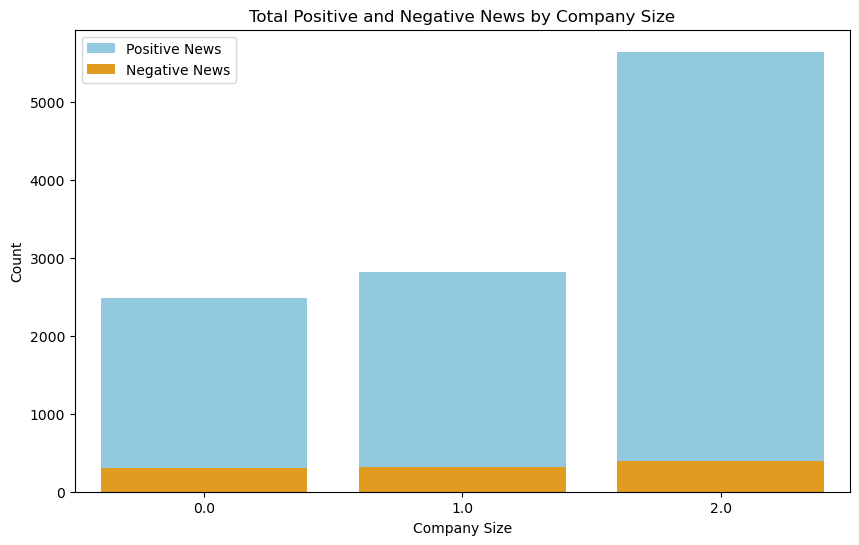

In [7]:
# Company size summary
stock_size = russell.copy()
stock_size['comp_size'] = pd.qcut(stock_size['market_cap'], q=3, labels=False)
company_size_summary = stock_size.groupby('comp_size').agg(
    sum_ret=('RET', 'sum'),
    total_positive=('positive', 'sum'),
    total_negative=('negative', 'sum'),
    total=('total', 'sum')
).reset_index()

company_size_summary['positive_perc'] = company_size_summary['total_positive'] / company_size_summary['total']
company_size_summary['negative_perc'] = company_size_summary['total_negative'] / company_size_summary['total']

# Plot bar chart of total positive and negative news by company size
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_summary, x='comp_size', y='total_positive', color='skyblue', label='Positive News')
sns.barplot(data=company_size_summary, x='comp_size', y='total_negative', color='orange', label='Negative News')
plt.title('Total Positive and Negative News by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend()
plt.show()


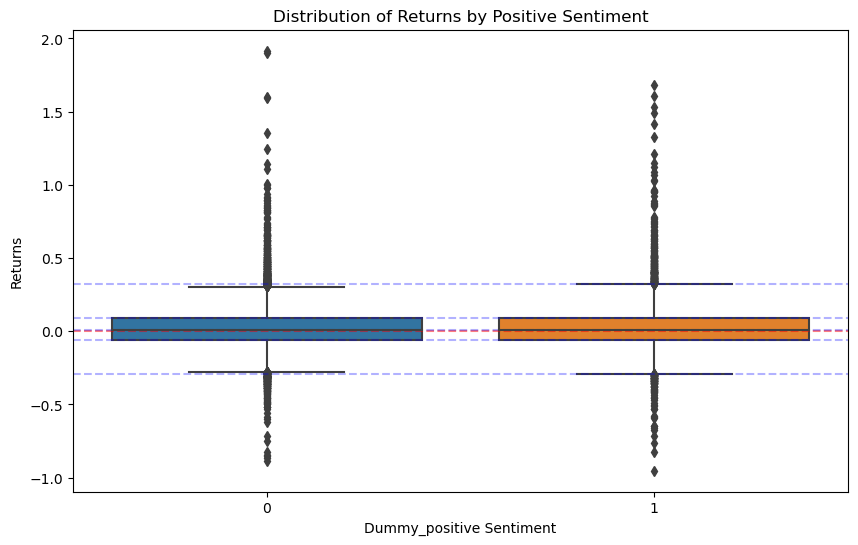

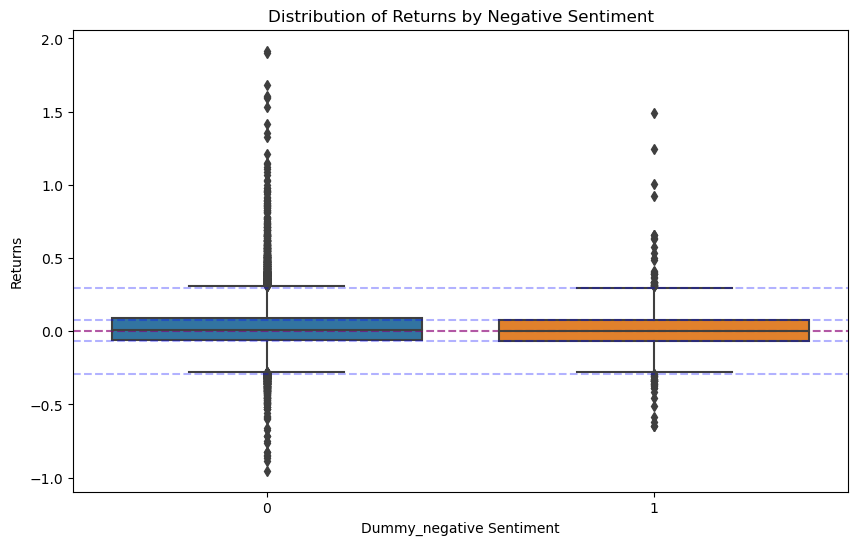

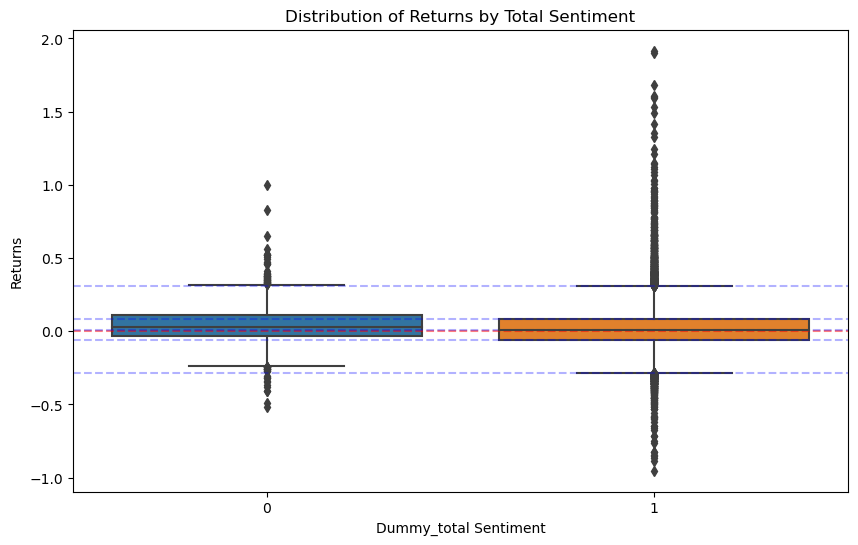

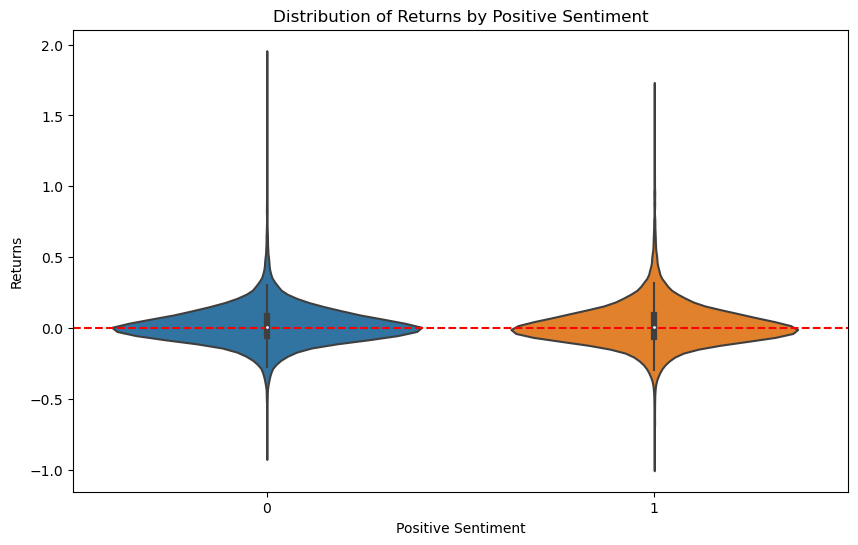

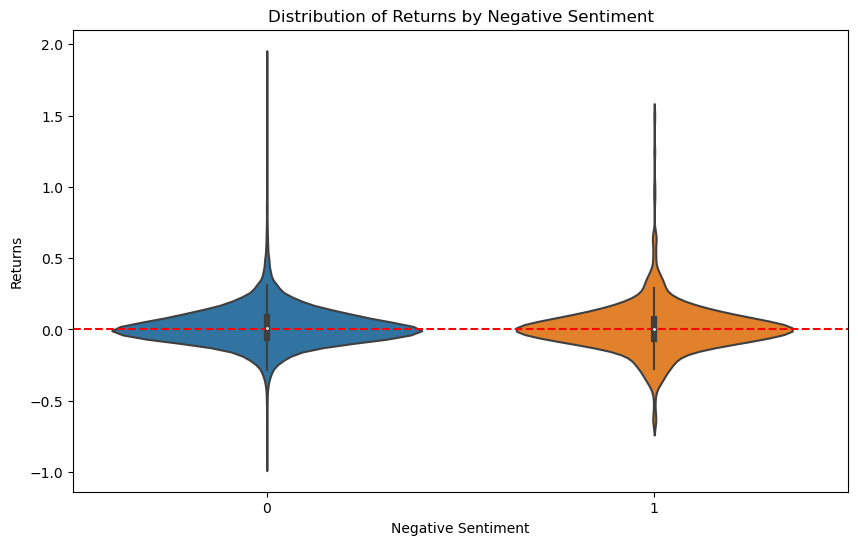

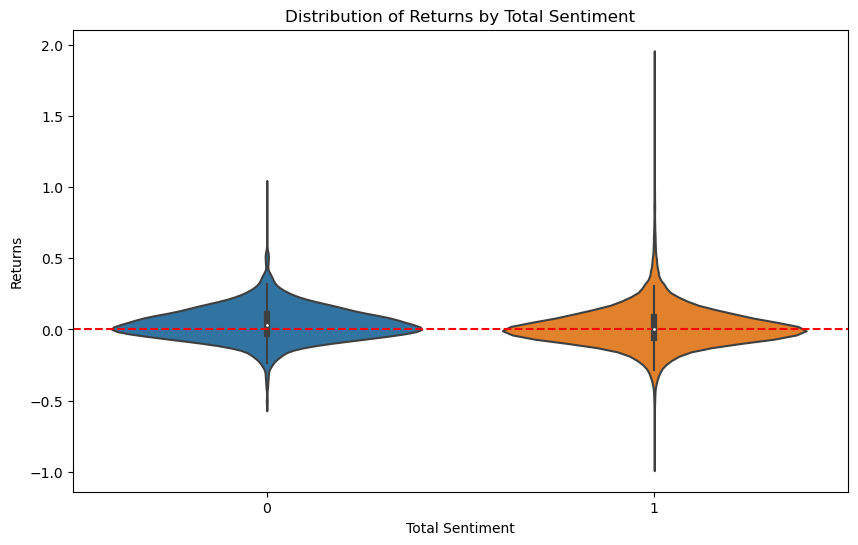

In [8]:
# Create dummy_negative column
russell['dummy_negative'] = (russell['negative'] >= 1).astype(int)

# Create dummy_positive column
russell['dummy_positive'] = (russell['positive'] >= 1).astype(int)

# Create dummy_total column
russell['dummy_total'] = (russell['total'] >= 1).astype(int)


# Function to plot with additional lines
def plot_with_lines(data, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=data)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    # Add blue dashed lines for critical points of value >= 1 category
    for i, box in enumerate(data.groupby(x_col)[y_col]):
        if box[0] == 1:
            quartiles = box[1].quantile([0.25, 0.5, 0.75])
            plt.axhline(y=quartiles[0.25], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.5], color='blue', linestyle='--', alpha=0.3)
            plt.axhline(y=quartiles[0.75], color='blue', linestyle='--', alpha=0.3)              
            iqr = quartiles[0.75] - quartiles[0.25]
            upper_limit = 1.5 * iqr + quartiles[0.75]
            lower_limit = quartiles[0.25] - 1.5 * iqr
            # Add additional blue dashed lines
            plt.axhline(y=upper_limit, color='blue', linestyle='--', alpha=0.3)  # Upper limit
            plt.axhline(y=lower_limit, color='blue', linestyle='--', alpha=0.3)  # Lower limit
    plt.title(title)
    plt.xlabel(x_col.capitalize() + ' Sentiment')
    plt.ylabel('Returns')
    plt.show()


# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'RET', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'RET', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'RET', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='RET', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()


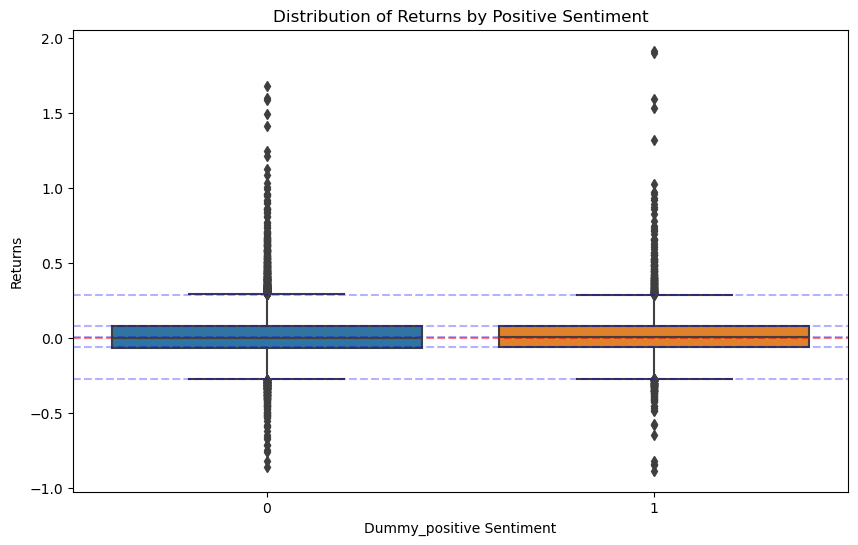

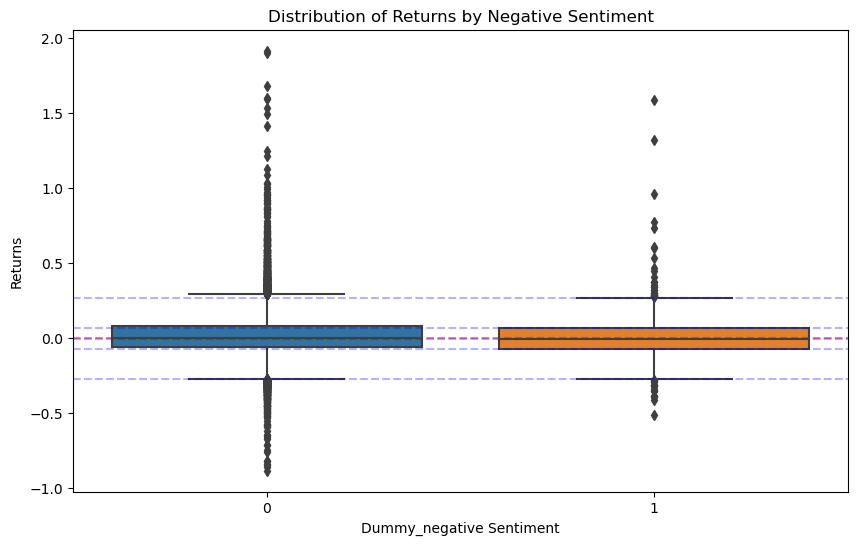

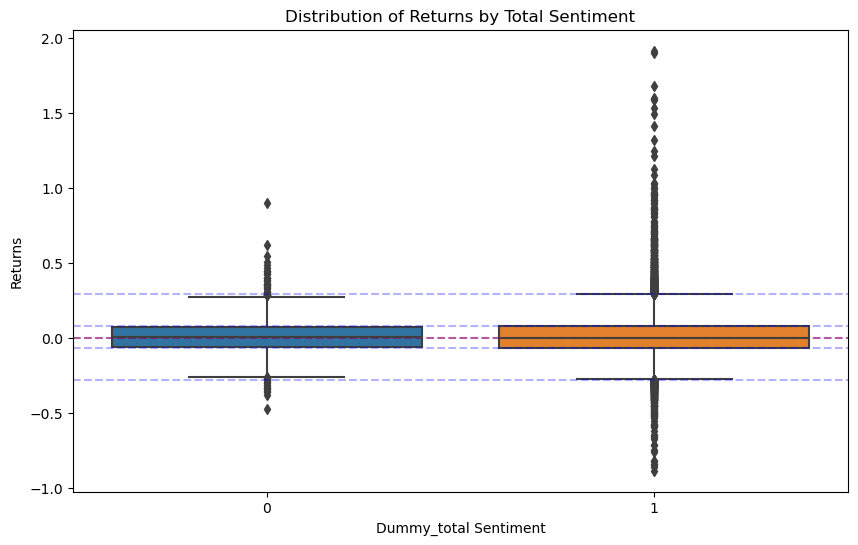

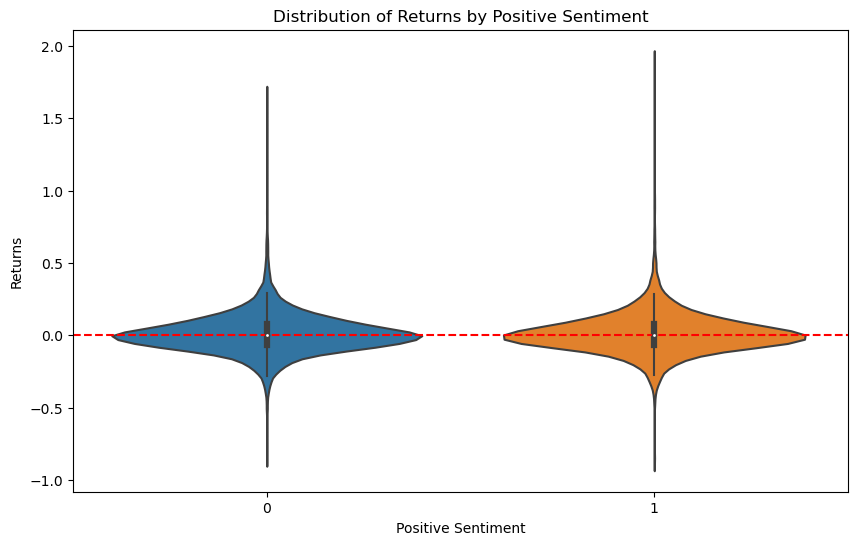

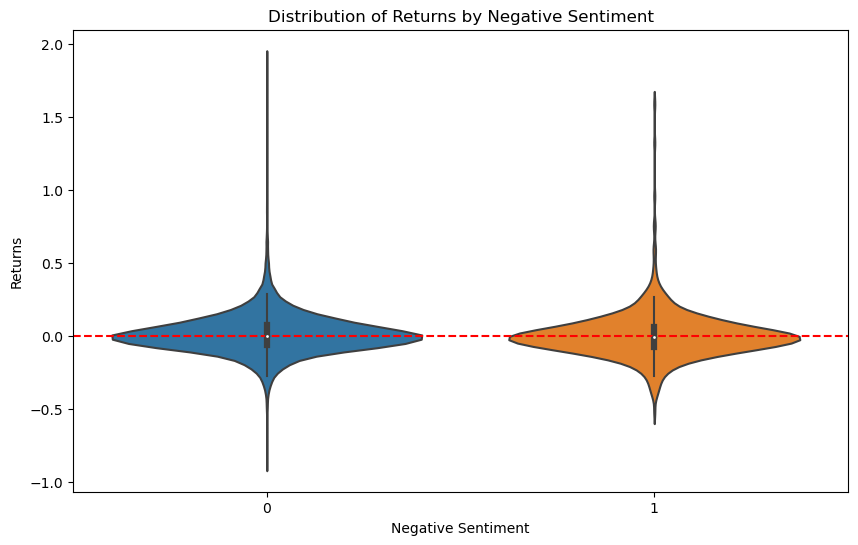

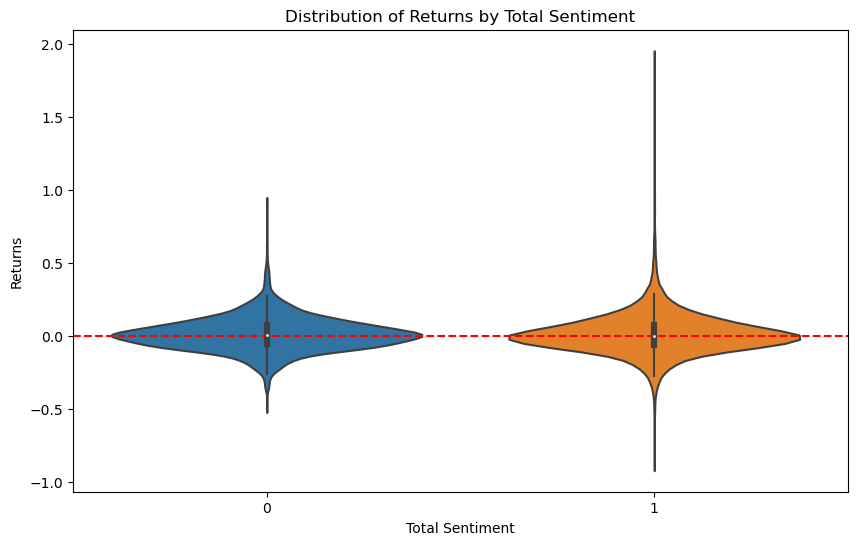

In [9]:
# Box plot for dummy_positive
plot_with_lines(russell, 'dummy_positive', 'next_month_return', 'Distribution of Returns by Positive Sentiment')

# Box plot for dummy_negative
plot_with_lines(russell, 'dummy_negative', 'next_month_return', 'Distribution of Returns by Negative Sentiment')

# Box plot for dummy_total
plot_with_lines(russell, 'dummy_total', 'next_month_return', 'Distribution of Returns by Total Sentiment')

# Violin plot for dummy_positive
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_positive', y='next_month_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Positive Sentiment')
plt.xlabel('Positive Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_negative
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_negative', y='next_month_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Negative Sentiment')
plt.xlabel('Negative Sentiment')
plt.ylabel('Returns')
plt.show()

# Violin plot for dummy_total
plt.figure(figsize=(10, 6))
sns.violinplot(x='dummy_total', y='next_month_return', data=russell)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Distribution of Returns by Total Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Returns')
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define a function to remove outliers using Z-score
def remove_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_filtered = df[(z_scores.abs() < threshold)]
    return df_filtered

# Remove outliers from the russell DataFrame
russell = remove_outliers(russell, 'Ask_minus_Bid')
russell = remove_outliers(russell, 'VOL')
russell.to_csv('monthly_russell_regression.csv', index=False)

# Calculate mean and standard deviation (volatility) for each combination of dummy variables
mean_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].mean()
std_negative = russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'].std()

mean_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].mean()
std_positive = russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'].std()

mean_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].mean()
std_total = russell[russell['dummy_total'] == 1]['Ask_minus_Bid'].std()

# Calculate mean and standard deviation (volatility) when the dummy variables are equal to zero
mean_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].mean()
std_negative_zero = russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'].std()

mean_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].mean()
std_positive_zero = russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'].std()

mean_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].mean()
std_total_zero = russell[russell['dummy_total'] == 0]['Ask_minus_Bid'].std()

# t-test for mean difference
t_statistic_mean_negative, p_value_mean_negative = ttest_ind(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

t_statistic_mean_positive, p_value_mean_positive = ttest_ind(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                             russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

t_statistic_mean_total, p_value_mean_total = ttest_ind(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                       russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Mann-Whitney U test for difference in volatility
u_statistic_vol_negative, p_value_vol_negative = mannwhitneyu(russell[russell['dummy_negative'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_negative'] == 0]['Ask_minus_Bid'])

u_statistic_vol_positive, p_value_vol_positive = mannwhitneyu(russell[russell['dummy_positive'] == 1]['Ask_minus_Bid'],
                                                              russell[russell['dummy_positive'] == 0]['Ask_minus_Bid'])

u_statistic_vol_total, p_value_vol_total = mannwhitneyu(russell[russell['dummy_total'] == 1]['Ask_minus_Bid'],
                                                        russell[russell['dummy_total'] == 0]['Ask_minus_Bid'])

# Create a DataFrame to display the results
data = {
    'Dummy': ['Negative', 'Positive', 'Total'],
    'Mean_with_Dummy': [mean_negative, mean_positive, mean_total],
    'Mean_without_Dummy': [mean_negative_zero, mean_positive_zero, mean_total_zero],
    'Volatility_with_Dummy': [std_negative, std_positive, std_total],
    'Volatility_without_Dummy': [std_negative_zero, std_positive_zero, std_total_zero],
    'Mean_Difference': [mean_negative - mean_negative_zero,
                        mean_positive - mean_positive_zero,
                        mean_total - mean_total_zero],
    'Volatility_Difference': [std_negative - std_negative_zero,
                              std_positive - std_positive_zero,
                              std_total - std_total_zero],
    'Mean_P_value': [p_value_mean_negative, p_value_mean_positive, p_value_mean_total],
    'Volatility_P_value': [p_value_vol_negative, p_value_vol_positive, p_value_vol_total]
}
df_results = pd.DataFrame(data)

# Display the results
print(df_results)

      Dummy  Mean_with_Dummy  Mean_without_Dummy  Volatility_with_Dummy  \
0  Negative        12.811481           12.566538              25.014497   
1  Positive        13.551863           12.158183              25.600369   
2     Total        12.572727           12.590895              26.361804   

   Volatility_without_Dummy  Mean_Difference  Volatility_Difference  \
0                 28.171870         0.244943              -3.157373   
1                 29.053123         1.393680              -3.452754   
2                 39.724503        -0.018168             -13.362699   

   Mean_P_value  Volatility_P_value  
0      0.812548        8.445719e-01  
1      0.000554        1.800562e-25  
2      0.975901        5.616399e-12  


In [11]:
# Specify the columns for which to calculate z-scores
columns_to_standardize = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_month_return', '1_month_ma', '2_month_ma', 
                          '3_month_ma', 'Ask_minus_Bid', 'last_month_volume']

# Group by ticker and standardize each group for specified columns
russell_grouped = russell.groupby('TICKER')[columns_to_standardize]

# Define a function to standardize values within each group
def standardize_group(group):
    group_std = (group - group.mean()) / group.std()
    return group_std

# Apply the standardization function to each group
russell_standardized = russell_grouped.transform(standardize_group)

# Replace original values with standardized values in the original DataFrame
russell[columns_to_standardize] = russell_standardized

# Check the modified DataFrame
print(russell.head())

  TICKER       date   SICCD                    COMNAM  market_cap    SHROUT  \
0      A 2023-01-31  3825.0  AGILENT TECHNOLOGIES INC    1.793228  0.830782   
1      A 2023-02-28  3825.0  AGILENT TECHNOLOGIES INC    1.487220  0.830782   
2      A 2023-03-31  3825.0  AGILENT TECHNOLOGIES INC    0.598013  0.819430   
3      A 2023-04-30  3826.0  AGILENT TECHNOLOGIES INC    0.639969  0.569702   
4      A 2023-05-31  3826.0  AGILENT TECHNOLOGIES INC   -0.030178  0.559246   

        VOL       PRC     ASKHI     BIDLO  ...  last_month_volume  1_month_ma  \
0 -1.520034  1.795351  1.713211  1.686809  ...                NaN    1.795351   
1 -1.539518  1.483281  1.548013  1.382973  ...          -1.468660    1.483281   
2 -0.481976  0.576985  0.687603  0.639317  ...          -1.487272    0.576985   
3 -1.002431  0.631267  0.401041  0.631526  ...          -0.477091    0.631267   
4  0.712503 -0.052604  0.088033 -0.418793  ...          -0.974238   -0.052604   

   2_month_ma  3_month_ma  proper?  As

Kurtosis:
BIDLO               -0.624266
ASKHI               -0.690600
PRC                 -0.690634
VOL                  0.238486
RET                 -0.450857
SHROUT              -0.578189
sprtrn              -1.097819
market_cap          -0.689196
last_month_return   -0.458887
1_month_ma          -0.690634
2_month_ma          -0.786323
3_month_ma          -0.882851
Ask_minus_Bid        0.074268
last_month_volume    0.131341
dtype: float64

Skewness:
BIDLO                0.179663
ASKHI                0.114459
PRC                  0.169879
VOL                  0.749727
RET                  0.229956
SHROUT              -0.121644
sprtrn               0.016297
market_cap           0.176876
last_month_return    0.247671
1_month_ma           0.169879
2_month_ma           0.134275
3_month_ma           0.063903
Ask_minus_Bid        0.739714
last_month_volume    0.726949
dtype: float64


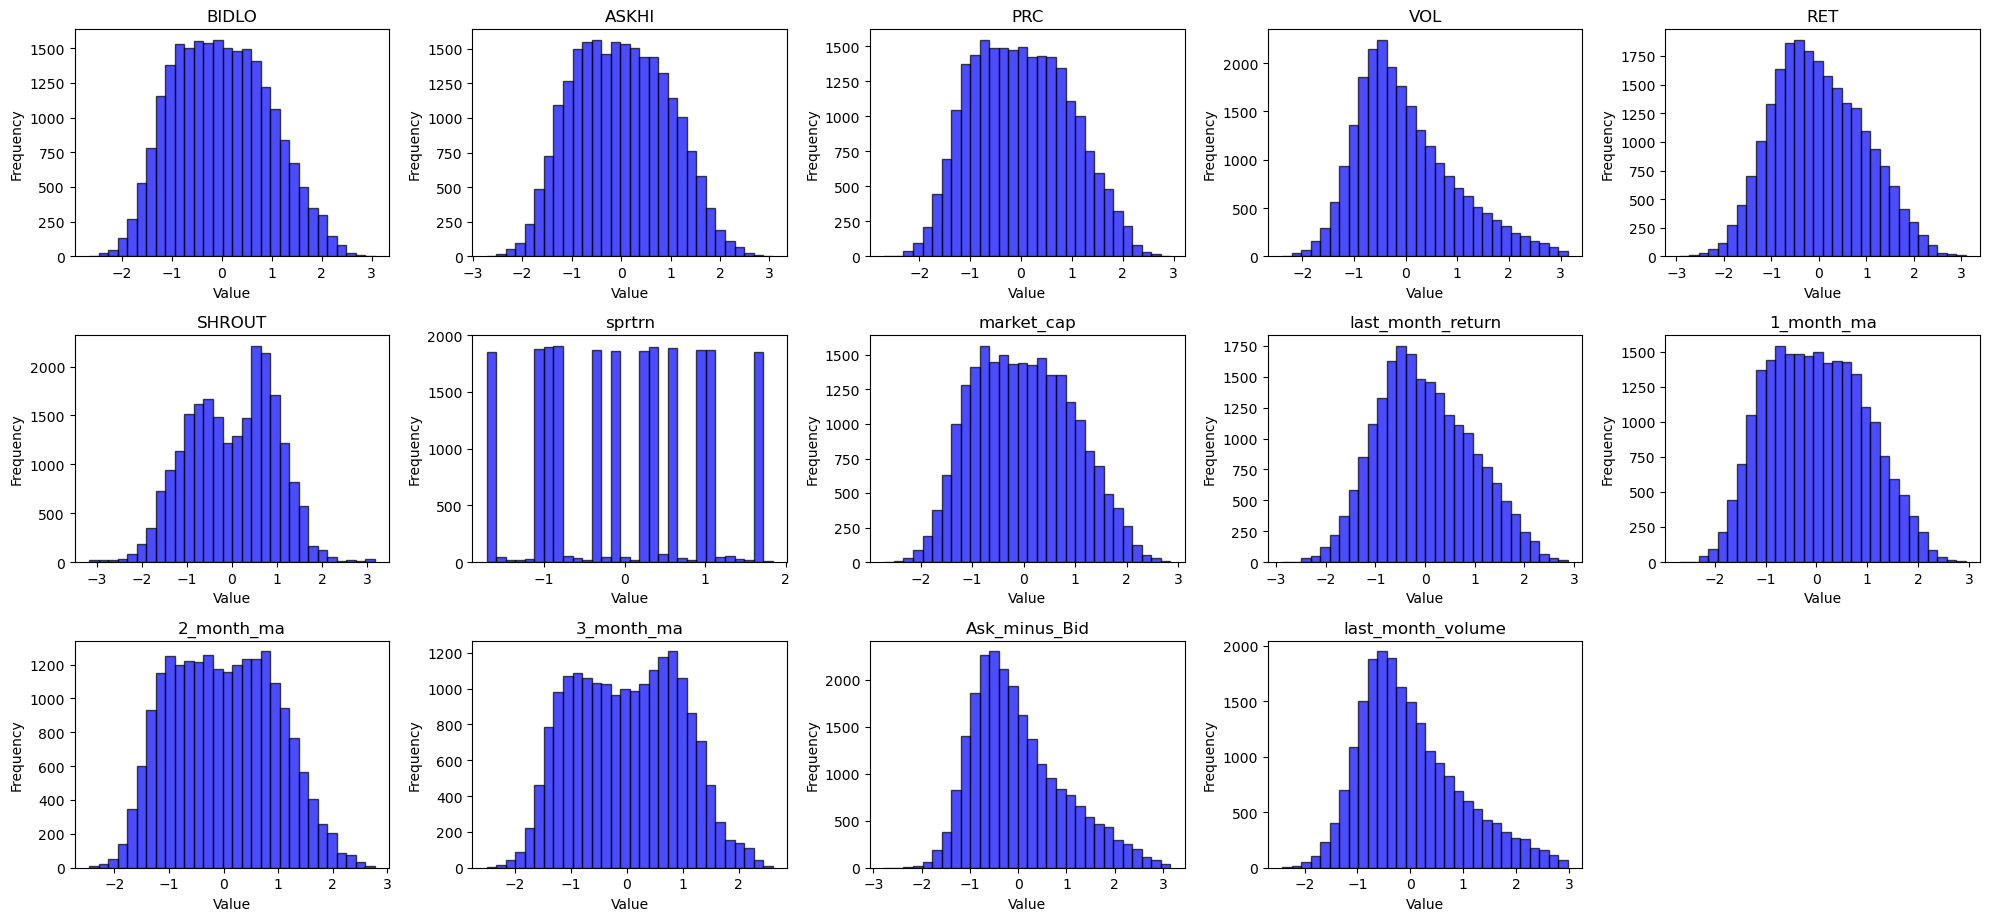

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate kurtosis and skewness for each numeric variable
numeric_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'sprtrn', 'market_cap', 'last_month_return', 
                   '1_month_ma', '2_month_ma', '3_month_ma', 'Ask_minus_Bid', 'last_month_volume']
kurtosis_values = russell[numeric_columns].kurtosis()
skewness_values = russell[numeric_columns].skew()

# Print kurtosis and skewness values for each numeric variable
print("Kurtosis:")
print(kurtosis_values)
print("\nSkewness:")
print(skewness_values)

# Plot histograms for each numeric variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(russell[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
russell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23446
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TICKER             23084 non-null  object        
 1   date               23084 non-null  datetime64[ns]
 2   SICCD              23075 non-null  float64       
 3   COMNAM             23084 non-null  object        
 4   market_cap         23079 non-null  float64       
 5   SHROUT             22859 non-null  float64       
 6   VOL                23079 non-null  float64       
 7   PRC                23079 non-null  float64       
 8   ASKHI              23079 non-null  float64       
 9   BIDLO              23079 non-null  float64       
 10  total              23084 non-null  float64       
 11  negative           23084 non-null  float64       
 12  positive           23084 non-null  float64       
 13  sprtrn             23079 non-null  float64       
 14  RET   

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

# Convert specified columns to categorical
russell['SICCD'] = russell['SICCD'].astype('category')
russell['comp_size'] = russell['comp_size'].astype('category')
russell['proper?'] = russell['proper?'].astype('category')
russell['dummy_negative'] = russell['dummy_negative'].astype('category')
russell['dummy_positive'] = russell['dummy_positive'].astype('category')
russell['dummy_total'] = russell['dummy_total'].astype('category')

russell.to_csv('standardized_monthly_russell_regression.csv', index=False)
russell_clean = russell.dropna()

# Select features and target variable
features = russell_clean.drop(columns=['next_month_return', 'TICKER', 'COMNAM', 'date'])
target = russell_clean['next_month_return']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="object")),
        ('cat', categorical_transformer, selector(dtype_include="object"))
    ])

# Define LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', lasso_cv)])

# Fit the model
pipeline.fit(X_train, y_train)

# Print the best alpha
print("Best alpha:", pipeline.named_steps['lasso'].alpha_)

# Print the R^2 score
print("R^2 score:", pipeline.score(X_test, y_test))

# Access the model coefficients
model_coefs = pipeline.named_steps['lasso'].coef_
print("Model coefficients:", model_coefs)

Best alpha: 6.545425019447302e-05
R^2 score: 0.24731651438767066
Model coefficients: [ 0.00041289 -0.0102669  -0.00045392 -0.00268053  0.00291324 -0.00590301
 -0.02674115  0.00644256 -0.0005527  -0.00249406  0.03703633 -0.03607336
 -0.02350298 -0.00928028  0.04176865 -0.01542693 -0.04471951  0.00858501
 -0.00632997 -0.00249871 -0.00089958  0.         -0.0013547 ]


In [15]:
russell = russell.dropna()

# Add a new column 'pred_lasso' to the russell dataframe with predictions
russell['pred_lasso'] = pipeline.predict(russell.drop(columns=['tomorrow_return', 'TICKER', 'COMNAM', 'date']))

# Display the first few rows of the dataframe to verify the new column
print(russell.head())

plt.hist(russell['pred_lasso'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Predicted Lasso Distribution')
plt.xlabel('Predicted Lasso Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

KeyError: "['tomorrow_return'] not found in axis"

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=12)

# Create pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', rf_model)])

# Define parameter grid
param_grid = {
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2]
}

# Perform grid search with reduced parameters and folds
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the best R^2 score
print("Best R^2 score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set R^2 score of the best model:", test_score)
